# Value at Risk and Conditional Value at risk using MonteCarlo


In [27]:
# imports
import os
import sys
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm


In [28]:
# Set time for a certian amount of number of years

years = 15
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=years*365)



In [29]:
# List of tickers

tickcers = ['SPY','BND','GLD','QQQ','VTI']

In [30]:
# get adj closed prices

df_adj_close = pd.DataFrame()

for ticker in tickcers:
     data = yf.download(ticker, start=startDate, end=endDate)
     df_adj_close[ticker] = data['Adj Close']

print(df_adj_close)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-03-04   53.899414  49.621403   88.989998   23.881538   26.888329
2009-03-05   51.697769  49.849384   91.989998   23.164999   25.799488
2009-03-06   51.787930  49.640907   92.290001   22.981497   25.791927
2009-03-09   51.179276  49.458504   90.570000   22.492159   25.481909
2009-03-10   54.230042  49.510628   88.139999   23.881538   27.107616
...                ...        ...         ...         ...         ...
2024-02-23  507.850006  72.180000  188.619995  436.779999  252.000000
2024-02-26  505.989990  7

In [31]:
# Calculate daily log returns and drop NaN values
log_returns = np.log(df_adj_close/df_adj_close.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-03-05 -0.041705  0.004584  0.033156 -0.030463 -0.041338
2009-03-06  0.001742 -0.004191  0.003256 -0.007953 -0.000293
2009-03-09 -0.011822 -0.003681 -0.018813 -0.021523 -0.012093
2009-03-10  0.057900  0.001053 -0.027197  0.059939  0.061846
2009-03-11  0.006492  0.002104  0.012179  0.015251  0.003620
...              ...       ...       ...       ...       ...
2024-02-23  0.000689  0.003609  0.005636 -0.002949  0.000675
2024-02-26 -0.003669 -0.001803 -0.002229 -0.000527 -0.003020
2024-02-27  0.001856 -0.001528 -0.001063  0.002402  0.002782
2024-02-28 -0.001323  0.002222  0.001807 -0.005339 -0.001668
2024-02-29  0.003588  0.001663  0.005137  0.008533  0.004206

[3773 rows x 5 columns]


In [32]:
# Create function to calculate portfolio expected return 
## Assuming future returns will be similar to past returns

def expected_return(weights, log_returns):
    return np.sum(weights*log_returns.mean())

In [33]:
# Create function to calculate portfolio std deviation

def portfolio_std_dev(weights, cov_matrix):
    varience = weights.T @ cov_matrix @ weights
    return np.sqrt(varience)

In [34]:
# Create cov matrix

cov_matrix = log_returns.cov()

In [35]:
# Create Equally Weighted Portfolio

#  Find total portfolio return and std deviation

portfolio_value = 1_000_000
weights = np.array([1/len(tickcers)]*len(tickcers))
portfolio_return_expected = expected_return(weights, log_returns)
portfolio_std_dev = portfolio_std_dev(weights, cov_matrix)





In [36]:
# function that gives random Z score based on normal distribution

def random_z_score():
    return np.random.normal(0,1)


In [49]:
# Function to calcluate senario gain or loss

days = 20
def scenario_gain_loss(portfolio_value,portfolio_return_expected, portfolio_std_dev, days, z_score):
    return portfolio_value * portfolio_return_expected * days + portfolio_value * portfolio_std_dev*np.sqrt(days)*z_score


In [57]:
# 10,000 sumulations

simulations = 100000
Senario_Returns = []

for i in range(simulations):
    z_score = random_z_score()
    # scenario_return = scenario_gain_loss(portfolio_value,portfolio_return_expected, portfolio_std_dev, days, z_score)
    Senario_Returns.append(scenario_gain_loss(portfolio_value,portfolio_return_expected, portfolio_std_dev, days, z_score))


In [60]:
# Specify the confidence interval and calculate the VaR

confidence_interval = 0.99
VAR = np.percentile(Senario_Returns, 100*(1-confidence_interval))
print(f"{VAR:,}")

-68,780.06015598506


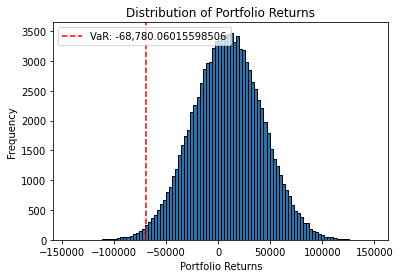

In [61]:
# Plot the distribution of the portfolio returns

plt.hist(Senario_Returns, bins=100, edgecolor='black')
plt.axvline(x=VAR, color='r', linestyle='--', label=f'VaR: {VAR:,}')
plt.title('Distribution of Portfolio Returns')
plt.xlabel('Portfolio Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()
